Unit 1, Sprint 3, Module 3

###Learning Objectives:
- Student can model the relationship of multple predictor variables to a single outcome.
- Student can conduct a t-test to determine the significance of individual variables in the model.
- Student can compare model fit using R-squared

#Use the following information to answer assignment questions 1 - 13.

###Is head size related to brain weight in healthy adult humans?

The Brainhead.csv dataset provides information on 237 individuals who were subject to post-mortem examination at the Middlesex Hospital in London around the turn of the 20th century. Study authors used cadavers to see if a relationship between brain weight and other more easily measured physiological characterizes such as age, sex, and head size could be determined. The end goal was to develop a way to estimate a person’s brain size while they were still alive (as the living aren’t keen on having their brains taken out and weighed). 

**We wish to determine if we can improve on our model of the linear relationship between head size and brain weight in healthy human adults.**

Source: R.J. Gladstone (1905). "A Study of the Relations of the Brain to the Size of the Head", Biometrika, Vol. 4, pp105-123.

In [36]:
#Import the Brainhead.csv dataset from a URL and print the first few rows

import pandas as pd
import numpy as np


data_url = 'https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Brainhead/Brainhead.csv'

df = pd.read_csv(data_url, skipinitialspace=True, header=0)

df.head()

,Gender,Age,Head,Brain
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


From the data dictionary:

Gender: 1 = male, 2 = female

Age: 1 = younger than age 46, 2 = age 46 and older

1) Run the OLS model relating head size to brain weight (you should have done this in your project yesterday) and print your results

In [37]:
### YOUR CODE HERE ###
from statsmodels.formula.api import ols
# Using Formula Y ~ X or Brain Weight ~ Head Size 
model = ols('Brain ~ Head', data = df).fit()

print (model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Brain   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     416.5
Date:                Wed, 09 Dec 2020   Prob (F-statistic):           5.96e-54
Time:                        05:02:37   Log-Likelihood:                -1350.3
No. Observations:                 237   AIC:                             2705.
Df Residuals:                     235   BIC:                             2711.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    325.5734     47.141      6.906      0.0

2) What is the adjusted $R^2$ for this model?  Explain what this value means in a complete sentence.



Answer here: -->

**The adjusted R square of this model is 0.638 or approx. 64%. This value means that 64% of variation in Head Size is explained by change in Brain weight.**


3) Right now age and gender are coded with 1 and 2.  Just to be safe when we run our model, we want to subtract "1" from Age and Gender so that "1" is now coded as "0" and "2" is now coded as "1".  Create two new variables in the dataframe to do this - don't overwrite the original variables.

In [38]:
print (df)

     Gender  Age  Head  Brain
0         1    1  4512   1530
1         1    1  3738   1297
2         1    1  4261   1335
3         1    1  3777   1282
4         1    1  4177   1590
..      ...  ...   ...    ...
232       2    2  3214   1110
233       2    2  3394   1215
234       2    2  3233   1104
235       2    2  3352   1170
236       2    2  3391   1120

[237 rows x 4 columns]


In [39]:
### YOUR CODE HERE ###
df['New_Age'] = df['Age'] - 1
df['New_Gender'] = df['Gender'] - 1
df

,Gender,Age,Head,Brain,New_Age,New_Gender
0,1,1,4512,1530,0,0
1,1,1,3738,1297,0,0
2,1,1,4261,1335,0,0
3,1,1,3777,1282,0,0
4,1,1,4177,1590,0,0
...,...,...,...,...,...,...
232,2,2,3214,1110,1,1
233,2,2,3394,1215,1,1
234,2,2,3233,1104,1,1
235,2,2,3352,1170,1,1


4) Model the relationship of age group and head size to brain weight.

In [40]:
### YOUR CODE HERE ###
from statsmodels.formula.api import ols
# Using Formula Y ~ X or Brain Weight ~ Head Size + New_Age
model = ols('Brain ~ Head + New_Age', data = df).fit()

print (model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Brain   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     214.1
Date:                Wed, 09 Dec 2020   Prob (F-statistic):           1.38e-53
Time:                        05:02:47   Log-Likelihood:                -1347.8
No. Observations:                 237   AIC:                             2702.
Df Residuals:                     234   BIC:                             2712.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    347.5505     47.811      7.269      0.0

5) At the alpha = 0.05 level, is age group statistically significantly associated with brain weight after accounting for head size?  Explain your answer in at least one complete sentence.

Answer here: -->

**At the set alpha of 5% and P value of 2.9% for New_Age we reject the null hypothesis and can conclude that the Age is statistically significantly associated with Brain Weight after accounting for Head Size. To further confirm our finding we see the Adjusted R Square value increase from 63.8% to 64.4% in the current model.**

6) At the alpha = 0.01 level, is age group statistically significantly associated with brain weight after accounting for head size?  Explain your answer in at least one complete sentence.

Answer here: -->

**At the set alpha of 1% and P value of 2.9% for New_Age we fail to reject the null hypothesis and conclude that the Age is NOT statistically significantly associated with Brain Weight after accounting for Head Size.**

7) What is the adjusted $R^2$ for the model relating head size and age group to brain weight?  Does adding age group to the model increase the amount of variability in brain weight explained by the model?

Answer here: -->

**The adjusted R square of the model relating head size and age group to brain weight is 64.4% (increased from 63.8 previously). Based on the adjusted R square value we can say that age is a factor in explaining a change in the brain weight given head size**

8) Model the relationship of gender and head size to brain weight.

In [41]:
### YOUR CODE HERE ###
from statsmodels.formula.api import ols
# Using Formula Y ~ X or Brain Weight ~ Head Size + New_Age
model = ols('Brain ~ Head + New_Gender', data = df).fit()

print (model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Brain   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     211.0
Date:                Wed, 09 Dec 2020   Prob (F-statistic):           4.15e-53
Time:                        05:02:50   Log-Likelihood:                -1348.9
No. Observations:                 237   AIC:                             2704.
Df Residuals:                     234   BIC:                             2714.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    378.7139     57.299      6.609      0.0

9) At the alpha = 0.05 level, is gender statistically significantly associated with brain weight after accounting for head size?  Explain your answer in at least one complete sentence.

Answer here: -->

**At the set alpha of 5% and P value of 10.7% for New_Gender we fail to reject the null hypothesis and can conclude that the Gender is NOT statistically significantly associated with Brain Weight after accounting for Head Size.**


10) Write the linear model (insert the coefficients in the correct places) used to model the relationship between head size, age group and predicted brain weight.




Answer here: 

**Brain Weight = 347.5505 + (Head Size * 0.2604) - (New_Age * 20.7316)**

11) Plot the relationship between head size and brain weight on a scatterplot. Use different color dots to represent older and younger individuals.

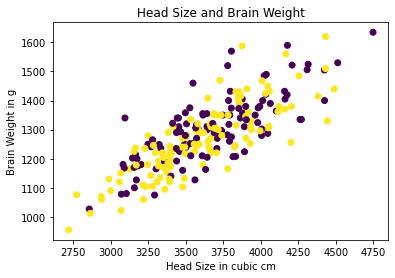

In [42]:
### YOUR CODE HERE ###
import seaborn as sns
import matplotlib.pyplot as plt

plt.scatter(x = 'Head', y = 'Brain', c = 'New_Age', data = df)
plt.xlabel('Head Size in cubic cm')
plt.ylabel('Brain Weight in g')
plt.title('Head Size and Brain Weight')
plt.show()

12) Estimate the brain weight of a 60-year-old with a head size of 4000 cubic cm.

In [43]:
### YOUR CODE HERE ###
# Make sure the model is correct while importing parameters
model = ols('Brain ~ Head + New_Age', data = df).fit()

x1 = 4000
x2 = 1

intercept = model.params[0] 
slope1 = model.params[1]
slope2 = model.params[2]

# Using these values to predict
predict = intercept + (slope1 * x1) + (slope2 * x2)
print (predict)

1368.573921722076


Answer here: -->

**The brain weight of the 60 year old with head size of 4000 cubic cm is 1368.6 grams.**


13) Estimate the brain weight of a 20-year-old with a head size of 3900 cubic cm.

In [44]:
### YOUR CODE HERE ###
x1 = 3900
x2 = 0

# Using  values to predict
predict = intercept + (slope1 * x1) + (slope2 * x2)
print (predict)

1363.261689710586


Answer here: -->

****The brain weight of the 20 year old with head size of 3900 cubic cm is 1363.3 grams.**


###Use the following information to answer questions 14 - 20


Import the Sleep.csv dataset from a URL and print the first few rows

Researchers recorded data on sleep duration as well as a set of ecological and constitutional variables  for a selection of mammal species. This data appears in the Sleep.csv dataset. 


Source: Allison, T. and Cicchetti, D. (1976), "Sleep in Mammals: Ecological and Constitutional Correlates",  Science, November 12, vol. 194, pp. 732-734.



Data Dictionary:

| Variable Name |            Description           |                                                                 Details                                                                 |              |   |
|:-------------:|:--------------------------------:|:---------------------------------------------------------------------------------------------------------------------------------------:|--------------|---|
| Animal        |            Animal name           |                                                            Character [string]                                                           |    |   |
| Body          |            Body weight           |                                                               Numeric [kg]                                                              |       |   |
| Brain         |           Brain weight           |                                                               Numeric [g]                                                               |  |   |
| SWsleep       | Slow wave (“non-dreaming”) sleep | Numeric [hours]                                                                                                                         |              |   |
| Parasleep     | Paradoxical (“dreaming”) sleep   | Numeric [hours]                                                                                                                         |              |   |
| Totsleep      | Total sleep                      | Numeric [hours]                                                                                                                         |              |   |
| Life          | Maximum life expectancy          | Numeric [years]                                                                                                                         |              |   |
| Gest          | Gestation time                   | Numeric [days]                                                                                                                          |              |   |
| Pred          | Predation index                  | Numeric [1 – 5] 1 = least likely to be preyed upon, 5 = most likely to be preyed upon                                                   |              |   |
| Exposure      | Sleep exposure index             | Numeric [1 – 5] 1 = least amount of exposure during sleep (mammal sleeps indoors or in a den), 5 = most amount of exposure during sleep |              |   |
| Danger        | Overall danger index             | Numeric [ 1 – 5] 1 = least amount of danger from other animals, 5 = most amount of danger from other animals                            |              |   |



In [45]:
data_url = 'https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Sleep/Sleep.csv'

sleep = pd.read_csv(data_url, skipinitialspace=True, header=0)

sleep['Log_gest'] = np.log(sleep['Gest'])

sleep.head()

,Animal,Body,Brain,SWsleep,Parasleep,Totsleep,Life,Gest,Pred,Exposure,Danger,Log_gest
0,African_giant_pouched_rat,1.000,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3,3.737670
1,Asian_elephant,2547.000,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4,6.436150
2,Baboon,10.550,179.5,9.1,0.7,9.8,27.0,180.0,4,4,4,5.192957
3,Big_brown_bat,0.023,0.3,15.8,3.9,19.7,19.0,35.0,1,1,1,3.555348
4,Brazilian_tapir,160.000,169.0,5.2,1.0,6.2,30.4,392.0,4,5,4,5.971262


14) Plot the relationship of body size to dreaming sleep and describe the shape of the relationship.

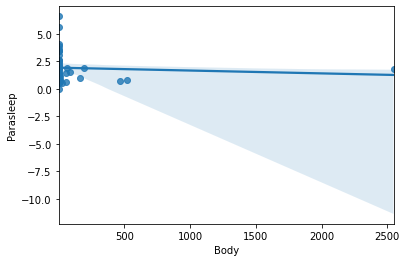

In [46]:
### CODE HERE ###
sns.regplot(x = 'Body', y = 'Parasleep', data= sleep)

Answer here: -->

**The regression plot is not the best with the data as is as there is an outlier currently. Assuming an elephant again. So we can drop that outlier as well.**

15) Does it appear that a log transformation would improve the model fit?  If yes, perform the log transformation and plot the resulting relationship with dreaming sleep.

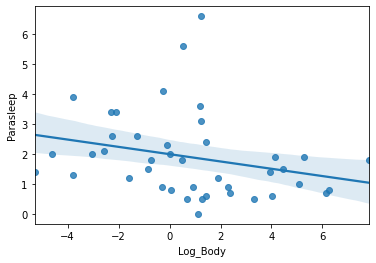

In [47]:
### CODE HERE ###
sleep['Log_Body'] = np.log(sleep['Body'])
sns.regplot(x = 'Log_Body', y = 'Parasleep', data= sleep)

Answer here: -->

**Yes since the data points were scattered along with the y-axis the log transformation really helped in spreading out the data points and a better regression fitting.**

16) Run an ols model using gestation time, danger index and the log of body size.  Is the log of body size statistically significantly associated with time spent in dreaming sleep after accounting for the other two factors?

In [48]:
### CODE HERE ###
# Using Formula Y ~ X or Parasleep ~ Log_Body + Gest + C(Danger)
model = ols('Parasleep ~ Log_Body + Gest + C(Danger)', data = sleep).fit()

print (model.summary())


                            OLS Regression Results                            
Dep. Variable:              Parasleep   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     4.670
Date:                Wed, 09 Dec 2020   Prob (F-statistic):            0.00138
Time:                        05:03:15   Log-Likelihood:                -60.534
No. Observations:                  42   AIC:                             135.1
Df Residuals:                      35   BIC:                             147.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.5683      0.392      9.

Answer here: -->

**Based on a P-Value of 36.3% and alpha of 5% the log of body size is NOT statistically significantly associated with time spent in dreaming sleep after accounting for the other two factors.**

17) Plot the relationship of gestational time and dreaming sleep with different colors for animals who experience different amounts of sleep exposure.

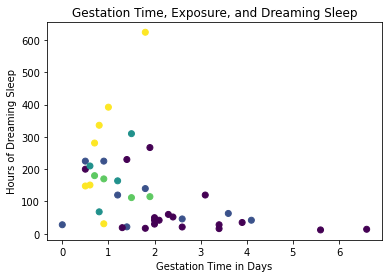

In [49]:
### CODE HERE ###

#Color the points differently depending the mammal's danger index
plt.scatter(x = sleep['Parasleep'], y = sleep['Gest'], c = sleep['Exposure'])

plt.title('Gestation Time, Exposure, and Dreaming Sleep')
plt.xlabel('Gestation Time in Days')
plt.ylabel('Hours of Dreaming Sleep')

plt.show()

18) Run an ols model using the log of gestation time and sleep exposure index to predict the amount of time spent in dreaming sleep.  Is sleep exposure index a better predictor of amount of time spent in dreaming sleep than danger index?

In [50]:
### CODE HERE ###
sleep['Log_Gest'] = np.log(sleep['Gest'])

# Using Formula Y ~ X or Parasleep ~ Log_Body + C(Exposure)
model = ols('Parasleep ~ Log_Gest + C(Exposure)', data = sleep).fit()

print (model.summary())

                            OLS Regression Results                            
Dep. Variable:              Parasleep   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     4.583
Date:                Wed, 09 Dec 2020   Prob (F-statistic):            0.00245
Time:                        05:03:18   Log-Likelihood:                -62.540
No. Observations:                  42   AIC:                             137.1
Df Residuals:                      36   BIC:                             147.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            4.6239      0.848  

In [51]:
# Using Formula Y ~ X or Parasleep ~ Log_Gest + C(Danger)
model = ols('Parasleep ~ Log_Gest + C(Danger)', data = sleep).fit()

print (model.summary())

                            OLS Regression Results                            
Dep. Variable:              Parasleep   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     9.071
Date:                Wed, 09 Dec 2020   Prob (F-statistic):           1.19e-05
Time:                        05:03:20   Log-Likelihood:                -55.763
No. Observations:                  42   AIC:                             123.5
Df Residuals:                      36   BIC:                             134.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          5.8263      0.731      7.

Answer here: -->

**To compare apples to apples another model with Parasleep ~ Log_Gest + C(Danger) was created so that comparison can be done nicely. The P values of Exposure model is higher than 5% (my set alpha) and Adjusted R Square for Exposure model is also worse than the Danger model, it can be concluded that the sleep exposure index is NOT a better predictor of amount of time spent in dreaming sleep than danger index.**

19) Plot the relationship of gestational time and dreaming sleep with different colors for animals who experience different amounts of sleep exposure.

In [ ]:
### CODE HERE ###

Answer here: -->

Same question as #17

20) Run an ols model using the log of gestation time and predation index to predict the amount of time spent in dreaming sleep.  Is predation index a better predictor of amount of time spent in dreaming sleep than danger index?

In [52]:
### CODE HERE ###
# Using Formula Y ~ X or Parasleep ~ Log_Gest + C(Danger)
model = ols('Parasleep ~ Log_Gest + C(Pred)', data = sleep).fit()

print (model.summary())

                            OLS Regression Results                            
Dep. Variable:              Parasleep   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     5.983
Date:                Wed, 09 Dec 2020   Prob (F-statistic):           0.000398
Time:                        05:03:23   Log-Likelihood:                -60.182
No. Observations:                  42   AIC:                             132.4
Df Residuals:                      36   BIC:                             142.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        5.4498      0.840      6.489   

Answer here: -->
**Again using the information from the Danger model above. The P values of Predation model is higher than 5% (my set alpha) and Adjusted R Square for Exposure model is also worse than the Danger model, it can be concluded that the Predation index is NOT a better predictor of amount of time spent in dreaming sleep than danger index.**

#Portfolio Project Assignment

Get (and give) constructive feedback to a peer.  Swap projects with at least one other student, and give each other constructive feedback.  Make sure to tell them what you like about their project as well as any suggestions you have for imporvement.



---

